In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# 차트의 한글 깨짐 방지를 위한 코드 추가

from matplotlib import font_manager, rc
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

%matplotlib inline

# 나이브 베이즈 분류기
LogisticRegression이나 LinearSVC 같은 선형분류기보다는 훈련속도가 빠르지만 일반화 성능이 조금 떨어진다.<br>각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합한다.
<br><br>
- GaissoanNB : 연속적인 데이터에도 적용가능
- BernoulliNB : 이진 데이터에 적용
- MultinomialNB : 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들어 문장에 나타난 단어 횟수)

아래 두개는 대부분 텍스트 데이터를 분류할 때 사용한다.

BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 센다. 다음의 예를 참고

In [4]:
X = np.array([[0,1,0,1],[1,0,1,1],[0,0,0,1],[1,0,1,0]])
y = np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)     # y==label => F,T,F,T
counts

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}

- MultinomialNB : 클래스별 특성의 평균을 저장
- GaissoanNB : 클래스별로 각 특성의 표준편차와 평균을 저장

매개변수와 장단점에 관해서는 p101을 참고

# 결정 트리
결정에 다다르기 위해 예/아니오를 이어가며 학습, 가능한한 적은 예/아니오 질문으로 문제를 해결짓는 것이 성능을 결정한다.

예/아니오를 이끌어내는 질문의 모델을 직접 만드는대신 지도 학습으로 데이터로부터 학습할 수 있다.

보통의 데이터는 예/아니오 형태의 특성으로 구성되어있지 않고 연속된 특성으로 구분된다. 연속적인 데이터에 적용할 테스트는 '특성i는 값 a보다 큰가?' 이다.

p103~105의 그림을 보면 이해가 쉬움

계층적으로 영역을 분할해가는 알고리즘으로 각 분할된 영역이 한 개의 타깃값을 가질 때까지 반복. 타깃 하나로만 이루어진 리프 노드를 순수 노드라고 한다.

회귀 문제에서도 트리를 사용할 수 있는데 각 노드의 테스트 결과에 따라 트리를 탐색해나가고 새로운 데이터 포인트에 해당되는 리프 노드를 찾아, 해당 리프 노드의 훈현 데이터 평균값이 이 데이터 포인트의 출력이 된다.

## 결정트리의 복잡도 제어
모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에만 과대적합된다.<br>
과대적합을 막기위해
1. 사전 가지치기 : 트리 생성을 일찍 중단하는 전략
2. 사후 가지치기 or 가지치기 : 트리를 만든 후 데이터 포인터가 적은 노드를 삭제하거나 병합하는 전략

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# 유방암 데이터셋을 이용
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target ,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
tree.score(X_train,y_train)

1.0

In [14]:
tree.score(X_test,y_test)

0.9370629370629371

In [15]:
# 위는 모든 리프 노드가 순수 노드이다. 그러나 깊이를 제한하지 않으면 무한정 복잡해질 수 있다.

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
tree.score(X_train,y_train)

0.9882629107981221

In [17]:
tree.score(X_test,y_test)

0.951048951048951

과대적합이 줄어든다.

## 결정 트리 분석
다음 모듈을 통해 트리를 시각화할 수 있다.

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False,filled=True)

In [21]:
!pip install graphviz

In [22]:
import graphviz
# dot 파일을 시각화하는 법은 모르겠다.

In [25]:
# 각 특성이 얼마나 중요하게 작동하는지 요약(특성중요도)

tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

0은 전혀 사용되지 않았다, 1은 완벽하게 타깃클래스를 예측했다는 의미

In [27]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

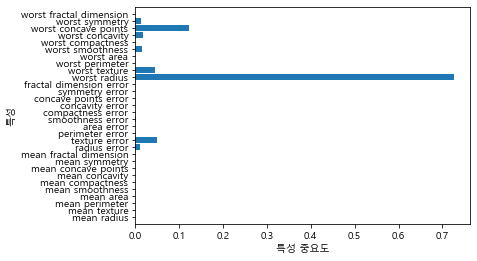

In [29]:
plot_feature_importances_cancer(tree)

feature_importance_값이 낮다고 유용하지 않은 특성이라는 의미는 아니다. 단지 해당 모델이 그 특성을 선택하지 않았다는 의미이다.<br>
선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없다.

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

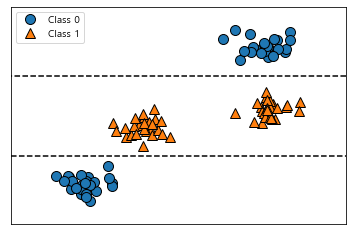

In [31]:
# 뭔가 에러가 있기는한데 그림은 잘 나왔으니 참고
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 두 개의 클래스를 구분하는데 0번의 정보는 전혀 사용되지 않았고 1번의 정보만 사용되었다.

### 회귀 트리
단, 훈련 데이터의 범위 밖의 포인트에 대해서는 예측을 할 수 없다.

Text(0, 0.5, '가격 ($/Mbyte)')

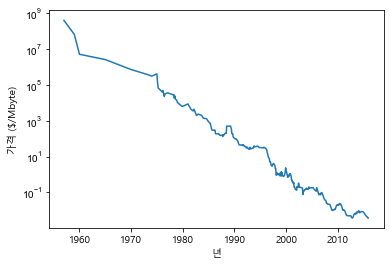

In [32]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [35]:
# 날짜 특성 하나만으로 2000년 전까지의 데이터로부터 2000년 후의 가격을 예측, 결정트리회귀와 선형회귀를 비교

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 날짜 특성만을 사용
X_train = data_train.date[:,np.newaxis]
# 데이터와 타깃 사이의 관계를 간단히 하기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

# 예측은 전체 기간에 대해서
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


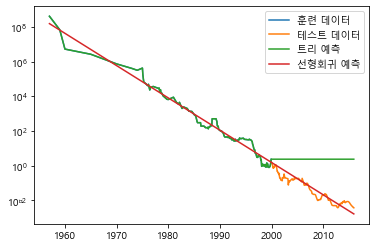

In [36]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

모델의 복잡도에 제한을 두지 않아 트리 모델이 훈련데이터를 완벽하게 예측하지만 훈련 데이터의 범위 밖에서는 아무 것도 예측하지 못함.<br> 가격의 상승,하락 등을 예측하는데는 적합할 수 있으나 시계열 데이터에 트리 모델은 잘 맞지 않음

매개변수  : max_depth, max_leaf_nodes, min_samples_leaf
<br>(sample은 각 노드가 포함하는 데이터의 갯수이다.)

장점 :  
1. 쉽게 시각화할 수 있어 비전문가를 납득시키기 좋음
2. 데이터 스케일에 구애받지 않음(각 특성이 개별적으로 처리되어 데이터 분할, 곧 표준화나 정규화의 과정이 필요없음)
    - 특성의 스케일이 서로 다르거나 이진 특성, 연속 특성이 혼합되어 있을 때도 잘 작동

단점 : 
1. 사전 가지치기를 사용함에도 과대적합되는 경향이 있어 일반화 성능은 좋지 않음

다음 앙상블 방법이 단일 결정 트리의 대안으로 흔히 사용된다.
